## Long Short-Term Memory 

In this assignment, we will learn about LSTM models. We will create an LSTM model for time series prediction.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import os
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

Below is a function for loading time series data collected by sensors. There are 9 different files, We have data about body acceleration, body gyro, and total acceleration for the x, y, and z axis

In [4]:
def load_func(path, file_ind=False):
    data_list = []
    if file_ind:
        filenames = [path]
    else:
        files = os.listdir(path)
        filenames = [path + '/' + f for f in files]
    for f in filenames:
        dataframe = pd.read_csv(f, header=None, delim_whitespace=True)
        data_list.append(dataframe.values)
    if len(data_list) > 1:
        return np.dstack(data_list)
    else:
        return data_list[0]

In [28]:
os.listdir('/content/drive/MyDrive/python_for_data_scientists/UCI HAR Dataset/train/Inertial Signals/')

['body_acc_x_train.txt',
 'body_acc_z_train.txt',
 'total_acc_y_train.txt',
 'body_gyro_z_train.txt',
 'total_acc_x_train.txt',
 'body_gyro_y_train.txt',
 'body_gyro_x_train.txt',
 'body_acc_y_train.txt',
 'total_acc_z_train.txt']

In [31]:
X_train = load_func("/content/drive/MyDrive/python_for_data_scientists/UCI HAR Dataset/train/Inertial Signals")
X_test = load_func("/content/drive/MyDrive/python_for_data_scientists/UCI HAR Dataset/test/Inertial Signals")
y_train_cat = load_func('/content/drive/MyDrive/python_for_data_scientists/UCI HAR Dataset/train/y_train.txt', True)
y_test_cat = load_func('/content/drive/MyDrive/python_for_data_scientists/UCI HAR Dataset/test/y_test.txt', True)

Print the dimensions of both the predictor variables and the target.

In [33]:
# Answer below:
print(X_train.shape)
print(X_test.shape)
print(y_train_cat.shape)
print(y_test_cat.shape)

(7352, 128, 9)
(2947, 128, 9)
(7352, 1)
(2947, 1)


The target variable is categorical. One hot encode the target variable.

In [34]:
y = pd.DataFrame(y_train_cat)

In [35]:
y[0].unique()

array([5, 4, 6, 1, 3, 2])

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
hottrain = to_categorical(y_train_cat)
hottest = to_categorical(y_test_cat)

In [38]:
print(hottrain.shape)
print(hottest.shape)

(7352, 7)
(2947, 7)


In [39]:
# Answer below:
onehot = OneHotEncoder(sparse=False)
trainhot = onehot.fit_transform(y_train_cat)
testhot = onehot.transform(y_test_cat)

In [40]:
print(trainhot.shape)
print(testhot.shape)

(7352, 6)
(2947, 6)


In [41]:
X_train.shape

(7352, 128, 9)

Create a model containing an LSTM layer with unit size 100, and input shape that is the tuple containing the number of columns in X and the number of files in X.

The next layer is a dropout layer. Choose 0.5 for the proportion. Then add a dense layer of unit size 100 and finally an output dense layer. 

In [42]:
# Answer below:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(7, activation='softmax'))

Print the model summary to ensure you have the correct number of parameters.

In [43]:
# Answer below:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               44000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 707       
Total params: 54,807
Trainable params: 54,807
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model. Select the appropriate activation, loss, and optimizer.

Run the model for 10 epochs with a batch size of 80.

In [44]:
# Answer below:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, hottrain, validation_data=(X_test, hottest), batch_size=80, epochs=10)

Epoch 1/10
92/92 [==============================] - 3s 16ms/step - loss: 1.5675 - accuracy: 0.3622 - val_loss: 1.9704 - val_accuracy: 0.2803
Epoch 2/10
92/92 [==============================] - 1s 10ms/step - loss: 0.9426 - accuracy: 0.5903 - val_loss: 2.2519 - val_accuracy: 0.2810
Epoch 3/10
92/92 [==============================] - 1s 11ms/step - loss: 0.6904 - accuracy: 0.7032 - val_loss: 2.1043 - val_accuracy: 0.2806
Epoch 4/10
92/92 [==============================] - 1s 11ms/step - loss: 0.4997 - accuracy: 0.7863 - val_loss: 1.9730 - val_accuracy: 0.2827
Epoch 5/10
92/92 [==============================] - 1s 10ms/step - loss: 0.4284 - accuracy: 0.8394 - val_loss: 2.4868 - val_accuracy: 0.2687
Epoch 6/10
92/92 [==============================] - 1s 10ms/step - loss: 0.2504 - accuracy: 0.9141 - val_loss: 3.0735 - val_accuracy: 0.2430
Epoch 7/10
92/92 [==============================] - 1s 11ms/step - loss: 0.1834 - accuracy: 0.9358 - val_loss: 3.3015 - val_accuracy: 0.2538
Epoch 8/10
92

Print the confusion matrix for the test data.

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
# Answer below:
preds = np.argmax(model.predict(X_test), axis=-1)

In [47]:
true = np.argmax(testhot, axis=1)

In [48]:
# Either print with unencoded target
print(confusion_matrix(y_test_cat, preds))

[[  0   0 494   0   0   2]
 [  0  22 440   0   0   9]
 [  0   5 374   0   0  41]
 [  0   1 490   0   0   0]
 [  0   0 531   0   0   1]
 [  0   0 276   2   0 259]]


In [49]:
# Or print with np.argmax decoder? function
print(confusion_matrix(true, preds))

[[  0   0   0 494   0   0   2]
 [  0   0  22 440   0   0   9]
 [  0   0   5 374   0   0  41]
 [  0   0   1 490   0   0   0]
 [  0   0   0 531   0   0   1]
 [  0   0   0 276   2   0 259]
 [  0   0   0   0   0   0   0]]


In [50]:
model1 = Sequential()
model1.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dropout(.5))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(6, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, trainhot, validation_data=(X_test, testhot), batch_size=80, epochs=10)

Epoch 1/10
92/92 [==============================] - 3s 18ms/step - loss: 1.3874 - accuracy: 0.4354 - val_loss: 2.7817 - val_accuracy: 0.1551
Epoch 2/10
92/92 [==============================] - 1s 11ms/step - loss: 0.7803 - accuracy: 0.6719 - val_loss: 1.8750 - val_accuracy: 0.2372
Epoch 3/10
92/92 [==============================] - 1s 10ms/step - loss: 0.5495 - accuracy: 0.7902 - val_loss: 2.6531 - val_accuracy: 0.3186
Epoch 4/10
92/92 [==============================] - 1s 11ms/step - loss: 0.4823 - accuracy: 0.8158 - val_loss: 3.9380 - val_accuracy: 0.2620
Epoch 5/10
92/92 [==============================] - 1s 11ms/step - loss: 0.2536 - accuracy: 0.9166 - val_loss: 4.3252 - val_accuracy: 0.2650
Epoch 6/10
92/92 [==============================] - 1s 11ms/step - loss: 0.2161 - accuracy: 0.9286 - val_loss: 5.3879 - val_accuracy: 0.2562
Epoch 7/10
92/92 [==============================] - 1s 10ms/step - loss: 0.2737 - accuracy: 0.9011 - val_loss: 5.5447 - val_accuracy: 0.2260
Epoch 8/10
92

In [51]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               44000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 606       
Total params: 54,706
Trainable params: 54,706
Non-trainable params: 0
_________________________________________________________________


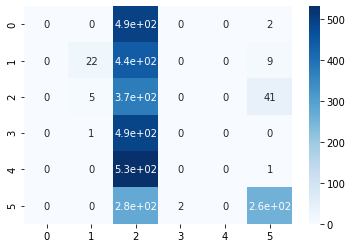

In [52]:
import seaborn as sns
cm = confusion_matrix(y_test_cat, preds)
sns.heatmap(cm, annot=True, cmap='Blues')

In [53]:
confusion_matrix(y_test_cat, preds)

array([[  0,   0, 494,   0,   0,   2],
       [  0,  22, 440,   0,   0,   9],
       [  0,   5, 374,   0,   0,  41],
       [  0,   1, 490,   0,   0,   0],
       [  0,   0, 531,   0,   0,   1],
       [  0,   0, 276,   2,   0, 259]])